<a href="https://colab.research.google.com/github/crisdavid3335/Clasificador_de_asteroides/blob/main/Ranking%20of%20Reuters%20articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
word_index = reuters.get_word_index()

word_index = dict([(value, key) for (key, value) in word_index.items()])

#for _ in train_data[0]:
#  print(word_index.get(_ -3))

565248/550378 [==============================] - 0s 0us/step


In [4]:
train_labels[0]

3

In [5]:
train_data.shape

(8982,)

In [6]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [ ]:
def vectorizar(sequences, dim = 10000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate(sequences):
    results[i,sequences] = 1
  return results

In [ ]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit(partial_x_train, 
          partial_y_train,
          epochs = 12,
          batch_size = 512,
          validation_data = (x_val, y_val))

Epoch 1/12
16/16 [==============================] - 2s 77ms/step - loss: 2.6854 - accuracy: 0.4949 - val_loss: 1.7107 - val_accuracy: 0.6370
Epoch 2/12
16/16 [==============================] - 1s 50ms/step - loss: 1.4020 - accuracy: 0.7101 - val_loss: 1.2923 - val_accuracy: 0.7270
Epoch 3/12
16/16 [==============================] - 1s 51ms/step - loss: 1.0507 - accuracy: 0.7835 - val_loss: 1.1414 - val_accuracy: 0.7520
Epoch 4/12
16/16 [==============================] - 1s 50ms/step - loss: 0.8410 - accuracy: 0.8198 - val_loss: 1.0370 - val_accuracy: 0.7850
Epoch 5/12
16/16 [==============================] - 1s 51ms/step - loss: 0.6820 - accuracy: 0.8507 - val_loss: 0.9780 - val_accuracy: 0.7920
Epoch 6/12
16/16 [==============================] - 1s 50ms/step - loss: 0.5489 - accuracy: 0.8809 - val_loss: 0.9985 - val_accuracy: 0.7900
Epoch 7/12
16/16 [==============================] - 1s 49ms/step - loss: 0.4454 - accuracy: 0.9047 - val_loss: 0.9168 - val_accuracy: 0.8090
Epoch 8/12
16

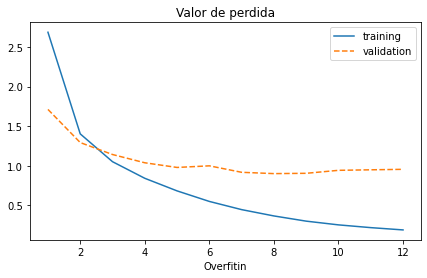

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize = (7,4))
epoch = range(1, len(val_loss_values)+1)
plt.plot(epoch, loss_values, '-', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.title('Valor de perdida')
plt.xlabel('Overfitin')
plt.legend()
plt.show()

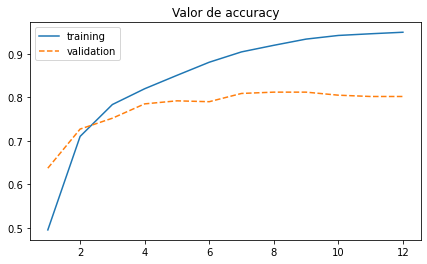

In [ ]:
history_dict = history.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']

fig = plt.figure(figsize = (7,4))
epoch = range(1, len(val_loss_values)+1)
plt.plot(epoch, loss_values, '-', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.title('Valor de accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0842 - accuracy: 0.7792


[1.0841517448425293, 0.7791629433631897]

seleccionar el numero de iteraciones optimas

In [ ]:
np.argmax(val_loss_values) #modelos grandes

7

predictions

In [ ]:
predictions = model.predict(x_test)

In [ ]:
np.argmax(predictions[4])

13

In [ ]:
test_labels[4]

4